In [4]:
pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ------- -------------------------------- 7.6/39.0 MB 39.3 MB/s eta 0:00:01
   ------------------ --------------------- 18.4/39.0 MB 44.6 MB/s eta 0:00:01
   ------------------------------- -------- 30.7/39.0 MB 49.9 MB/s eta 0:00:01
   ---------------------------------------  38.8/39.0 MB 49.3 MB/s eta 0:00:01
   ---------------------------------------- 39.0/39.0 MB 41.3 MB/s  0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------------------------ --------------- 7.9/12.6 MB 34.9 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 37.7 MB/s  0:00:00

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.5

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-2.3.5:
   ---------------------------------------- 0/2 [numpy]
   ------------------------------------

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration ---
# Assuming your notebook is in the parent directory of flower_image
DATA_DIR = 'flower_images'
IMAGE_SIZE = (100, 100) # Standardize all images to 100x100 pixels

# Lists to store the processed images and their labels
images = []
labels = []
class_names = []

# --- 1. Iterate through class folders ---

print(f"Starting to load images from: {DATA_DIR}")

# os.listdir gets all folders/files inside DATA_DIR
for class_folder in os.listdir(DATA_DIR):
    # Construct the full path to the current class folder
    class_path = os.path.join(DATA_DIR, class_folder)
    
    # Check if the path is actually a directory (and not a hidden file)
    if os.path.isdir(class_path):
        class_names.append(class_folder)
        print(f"Processing class: {class_folder}")
        
        # --- 2. Iterate through image files in the class folder ---
        
        for image_name in os.listdir(class_path):
            # Check if the file is a standard image file (you might expand this)
            if image_name.endswith(('.jpg', '.jpeg', '.png')):
                
                # Construct the full path to the image
                image_path = os.path.join(class_path, image_name)
                
                # Load the image using OpenCV (cv2.IMREAD_COLOR loads as BGR)
                img = cv2.imread(image_path)
                
                if img is not None:
                    # --- 3. Preprocessing Steps ---
                    
                    # a) Convert to Grayscale
                    # cv2.COLOR_BGR2GRAY is the standard conversion for OpenCV-loaded images
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    
                    # b) Resize the image to a standard size
                    resized_img = cv2.resize(gray_img, IMAGE_SIZE)
                    
                    # Store the processed image (as a NumPy array) and its label
                    images.append(resized_img)
                    labels.append(class_folder)
                else:
                    print(f"Warning: Could not load image {image_path}")

print("\nFinished loading and processing images.")

# --- 4. Final Data Conversion ---

# Convert lists to NumPy arrays for machine learning use
X = np.array(images)
# Create numerical labels (e.g., 0, 1, 2, 3, 4)
unique_labels = sorted(list(set(labels)))
label_to_int = {name: i for i, name in enumerate(unique_labels)}
Y = np.array([label_to_int[label] for label in labels])

print("-" * 40)
print(f"Total images loaded (X): {X.shape}") 
print(f"Total labels loaded (Y): {Y.shape}")
print(f"Shape of a single image: {X[0].shape} (Height, Width)")
print(f"Number of classes: {len(class_names)}")
print(f"Class Names: {class_names}")
print("-" * 40)

Starting to load images from: flower_images
Processing class: Lilly
Processing class: Lotus
Processing class: Orchid
Processing class: Sunflower
Processing class: Tulip

Finished loading and processing images.
----------------------------------------
Total images loaded (X): (4999, 100, 100)
Total labels loaded (Y): (4999,)
Shape of a single image: (100, 100) (Height, Width)
Number of classes: 5
Class Names: ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
----------------------------------------


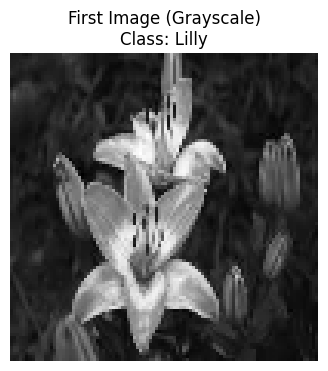

In [7]:
# Display the first image and its label
if len(X) > 0:
    plt.figure(figsize=(4, 4))
    # Use 'gray' colormap because the data is grayscale
    plt.imshow(X[0], cmap='gray') 
    plt.title(f"First Image (Grayscale)\nClass: {labels[0]}")
    plt.axis('off')
    plt.show()
else:
    print("No images were loaded. Check your DATA_DIR path.")

Starting to load and preprocess images from: flower_images
Finished loading 4999 images.


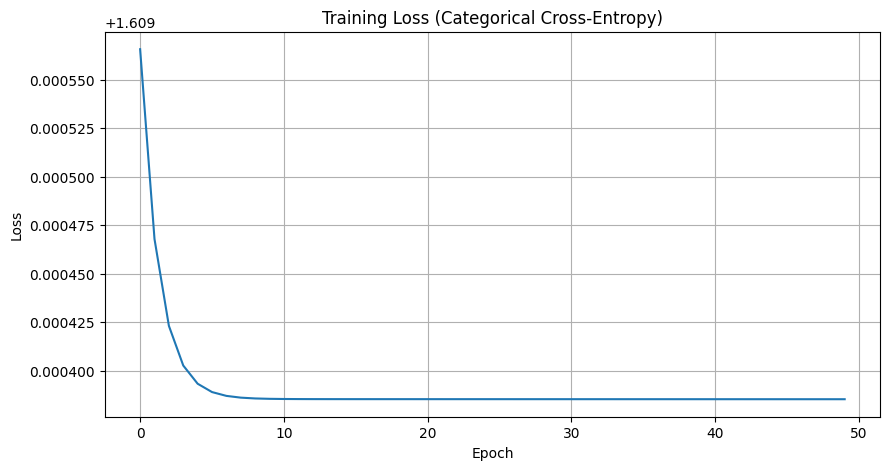


             EVALUATION RESULTS
Overall Accuracy: **0.1880**

--- Summary Metrics (Macro Average) ---
Precision: 0.0376
Recall:    0.2000
F1-Score:  0.0633

--- Per-Class Metrics ---
| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| Lilly | 0.0000  | 0.0000 | 0.0000 | 212     |
| Lotus | 0.0000  | 0.0000 | 0.0000 | 201     |
| Orchid | 0.0000  | 0.0000 | 0.0000 | 203     |
| Sunflower | 0.1880  | 1.0000 | 0.3165 | 188     |
| Tulip | 0.0000  | 0.0000 | 0.0000 | 196     |


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import os
import cv2 # We need OpenCV for image loading

# Set a consistent seed for reproducibility
np.random.seed(42)

# --- I. DATA GENERATION AND PREPARATION (NEW: IMAGE LOADING) ---

DATA_DIR = 'flower_images'
IMAGE_SIZE = (100, 100)
images = []
labels_raw = []
class_names = []

print(f"Starting to load and preprocess images from: {DATA_DIR}")

# Load and preprocess all images
for class_folder in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_folder)
    if os.path.isdir(class_path):
        class_names.append(class_folder)
        # Using enumerate to assign numerical labels automatically
        current_label = len(class_names) - 1 

        for image_name in os.listdir(class_path):
            if image_name.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(class_path, image_name)
                img = cv2.imread(image_path)
                
                if img is not None:
                    # 1. Convert to Grayscale
                    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    
                    # 2. Resize
                    resized_img = cv2.resize(gray_img, IMAGE_SIZE)
                    
                    # Store
                    images.append(resized_img)
                    labels_raw.append(current_label)

print(f"Finished loading {len(images)} images.")

# 1. Convert to NumPy Arrays
X = np.array(images)
Y_numerical = np.array(labels_raw)

# 2. Flatten Images: (N, 100, 100) -> (N, 10000)
# A simple fully-connected network requires a 1D input vector per image.
X_flattened = X.reshape(X.shape[0], -1) 

# 3. Normalize Pixel Values: (0-255) -> (0.0-1.0)
X_normalized = X_flattened / 255.0

# 4. One-Hot Encode Y_numerical
# Use Y_numerical here as the input for OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
Y_ohe = ohe.fit_transform(Y_numerical.reshape(-1, 1))

# Split the generated dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y_ohe, test_size=0.2, random_state=42)

# --- II. NEURAL NETWORK CLASS MODIFICATION (ADJUSTED FOR IMAGE INPUT) ---

class NeuralNetwork(object):
    def __init__(self):
        # 1. Define Network Architecture
        # INPUT CHANGE: Input is now 100*100 = 10000 features
        inputLayerNeurons = X_train.shape[1]  # 10000
        
        # Hidden layer sizes MUST be re-evaluated for large input, 
        # but we'll use the original pattern with larger first layer
        hidden1LayerNeurons = 512 # Increased size for complex image data
        hidden2LayerNeurons = 128
        hidden3LayerNeurons = 64
        outLayerNeurons = Y_train.shape[1]    # 5 classes
        
        self.learning_rate = 0.1 # Reduced learning rate further for stability with large input
        
        # 2. Initialize Weights for 3 Hidden Layers + Output Layer
        # Initialization scale is crucial for large networks
        scale = 1 / np.sqrt(inputLayerNeurons) # Heuristic for large inputs
        self.W_H1I = np.random.randn(inputLayerNeurons, hidden1LayerNeurons) * scale
        self.W_H2H1 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons) * 0.01
        self.W_H3H2 = np.random.randn(hidden2LayerNeurons, hidden3LayerNeurons) * 0.01
        self.W_OH3 = np.random.randn(hidden3LayerNeurons, outLayerNeurons) * 0.01
        
        # Store layer outputs for backpropagation
        self.hidden1_output = None
        self.hidden2_output = None
        self.hidden3_output = None

    def sigmoid(self, x, der=False):
        """Sigmoid activation function for hidden layers."""
        if der == True:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))
            
    def softmax(self, x):
        """Softmax activation function for the output layer (Multi-class)."""
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)
        
    # feedForward, backPropagation, and train methods remain the same, 
    # as they correctly handle the matrix algebra with the new input size.
    
    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(hidden1_input)
        
        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.sigmoid(hidden2_input)
        
        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2)
        self.hidden3_output = self.sigmoid(hidden3_input)
        
        output_input = np.dot(self.hidden3_output, self.W_OH3)
        pred = self.softmax(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        m = X.shape[0] 
        output_delta = (pred - Y) / m
        
        # Hidden Layer 3
        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, der=True)
        
        # Hidden Layer 2
        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, der=True)
        
        # Hidden Layer 1
        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, der=True)
        
        # Weight Updates
        self.W_OH3 -= self.learning_rate * self.hidden3_output.T.dot(output_delta)
        self.W_H3H2 -= self.learning_rate * self.hidden2_output.T.dot(hidden3_delta)
        self.W_H2H1 -= self.learning_rate * self.hidden1_output.T.dot(hidden2_delta)
        self.W_H1I -= self.learning_rate * X.T.dot(hidden1_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

# --- III. LOSS FUNCTION AND TRAINING ---

def categorical_cross_entropy_loss(Y_true, Y_pred):
    """Calculate Categorical Cross-Entropy Loss."""
    Y_pred = np.clip(Y_pred, 1e-12, 1. - 1e-12)
    N = Y_true.shape[0]
    cce = -np.sum(Y_true * np.log(Y_pred)) / N
    return cce

# Initialize and Train
NN = NeuralNetwork()
err = []
epochs = 50 # Reduced epochs as image training is slower

for i in range(epochs):
    # Training with the full batch (Gradient Descent)
    NN.train(X_train, Y_train) 
    
    current_pred = NN.feedForward(X_train)
    loss = categorical_cross_entropy_loss(Y_train, current_pred)
    err.append(loss)
    
    if (i + 1) % 500 == 0:
        print(f"Epoch {i+1}/{epochs}, Loss: {loss:.4f}")

# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(err)
plt.title('Training Loss (Categorical Cross-Entropy)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# --- IV. EVALUATION ---

print("\n" + "="*40)
print("             EVALUATION RESULTS")
print("="*40)

# Get predictions on test set
Y_test_pred_probs = NN.feedForward(X_test)
Y_test_pred_labels = np.argmax(Y_test_pred_probs, axis=1)
Y_test_true_labels = np.argmax(Y_test, axis=1)

# Calculate Accuracy and Metrics
accuracy = accuracy_score(Y_test_true_labels, Y_test_pred_labels)
precision, recall, f1_score, support = precision_recall_fscore_support(
    Y_test_true_labels, Y_test_pred_labels, average=None, zero_division=0
)
overall_metrics = precision_recall_fscore_support(
    Y_test_true_labels, Y_test_pred_labels, average='macro', zero_division=0
)

print(f"Overall Accuracy: **{accuracy:.4f}**")
print("\n--- Summary Metrics (Macro Average) ---")
print(f"Precision: {overall_metrics[0]:.4f}")
print(f"Recall:    {overall_metrics[1]:.4f}")
print(f"F1-Score:  {overall_metrics[2]:.4f}")

print("\n--- Per-Class Metrics ---")
print(f"| Class | Precision | Recall | F1-Score | Support |")
print(f"|-------|-----------|--------|----------|---------|")
for i in range(Y_ohe.shape[1]):
    print(f"| {class_names[i]:<5} | {precision[i]:.4f}  | {recall[i]:.4f} | {f1_score[i]:.4f} | {support[i]:<7} |")

In [12]:
print(NN.feedForward(X[0]))

ValueError: shapes (100,100) and (10000,512) not aligned: 100 (dim 1) != 10000 (dim 0)